In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostRegressor

import xgboost as xgb

In [49]:
df = pd.read_csv('./measures_v2.csv')

cutting_range = 50000
df = df[:cutting_range]
df

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,97.313408,18.574137,25.265585,-0.408775,25.703962,1999.978149,-2.000111,1.098282,33.099789,23.306946,23.196777,-0.063604,12
49996,97.277214,18.539894,25.239769,-0.403208,25.692368,1999.977295,-2.001713,1.096653,33.095451,23.325966,23.205441,-0.073077,12
49997,97.257133,18.505558,25.234053,-0.398452,25.686609,1999.980591,-2.001548,1.097297,33.111149,23.330736,23.202974,-0.079101,12
49998,97.235535,18.456192,25.243505,-0.396260,25.688269,1999.979980,-1.999005,1.096315,33.125492,23.320904,23.218935,-0.085294,12


In [50]:
output = df[['pm']]
output

,pm
0,24.554214
1,24.538078
2,24.544693
3,24.554018
4,24.565397
...,...
49995,33.099789
49996,33.095451
49997,33.111149
49998,33.125492


In [51]:
df.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   u_q             50000 non-null  float64
 1   coolant         50000 non-null  float64
 2   stator_winding  50000 non-null  float64
 3   u_d             50000 non-null  float64
 4   stator_tooth    50000 non-null  float64
 5   motor_speed     50000 non-null  float64
 6   i_d             50000 non-null  float64
 7   i_q             50000 non-null  float64
 8   pm              50000 non-null  float64
 9   stator_yoke     50000 non-null  float64
 10  ambient         50000 non-null  float64
 11  torque          50000 non-null  float64
 12  profile_id      50000 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 5.0 MB


### ข้อมูลดิบ

In [53]:
df.describe()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000
mean,82.080539,18.737684,44.313960,-44.461345,38.016045,2658.007438,-55.146969,59.851040,44.711225,30.415893,23.371411,47.020056,11.52608
std,27.498737,0.430306,16.036946,40.896766,11.510279,1653.298110,48.547100,59.769524,12.306458,6.926126,0.877733,46.491697,4.71700
min,-0.974433,17.468487,19.049341,-97.081703,18.268650,-0.005365,-143.617004,-0.000785,24.082582,18.076689,19.850620,-0.932627,5.00000
25%,49.993831,18.403530,26.161150,-85.316334,26.204615,999.995483,-97.258123,1.096891,34.244715,23.584067,23.172017,-0.091604,5.00000
50%,83.362717,18.685298,49.131987,-43.000139,39.695734,1999.979126,-43.511848,53.330410,44.281654,32.877623,23.313335,48.489584,12.00000
75%,96.769711,19.079448,49.805905,-0.621031,43.200775,4999.945801,-2.001594,132.617340,52.280387,33.588692,23.602050,101.862602,17.00000
max,131.331100,19.986029,72.430313,2.103876,58.746349,4999.971191,0.004419,132.619171,69.588531,42.770332,25.875355,103.667618,17.00000


### Clean Data

In [54]:
df.dropna(inplace=True)
df = df.drop("profile_id", axis=1)
print(f'Has Null : {df.isnull().values.any()}')
# Count the number of NaNs each column has.
nans = pd.isnull(df).sum()
nans[nans > 0]

Has Null : False


Series([], dtype: int64)

### ข้อมูลหลังแก้ไข้

In [55]:
df.describe()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,82.080539,18.737684,44.313960,-44.461345,38.016045,2658.007438,-55.146969,59.851040,44.711225,30.415893,23.371411,47.020056
std,27.498737,0.430306,16.036946,40.896766,11.510279,1653.298110,48.547100,59.769524,12.306458,6.926126,0.877733,46.491697
min,-0.974433,17.468487,19.049341,-97.081703,18.268650,-0.005365,-143.617004,-0.000785,24.082582,18.076689,19.850620,-0.932627
25%,49.993831,18.403530,26.161150,-85.316334,26.204615,999.995483,-97.258123,1.096891,34.244715,23.584067,23.172017,-0.091604
50%,83.362717,18.685298,49.131987,-43.000139,39.695734,1999.979126,-43.511848,53.330410,44.281654,32.877623,23.313335,48.489584
75%,96.769711,19.079448,49.805905,-0.621031,43.200775,4999.945801,-2.001594,132.617340,52.280387,33.588692,23.602050,101.862602
max,131.331100,19.986029,72.430313,2.103876,58.746349,4999.971191,0.004419,132.619171,69.588531,42.770332,25.875355,103.667618


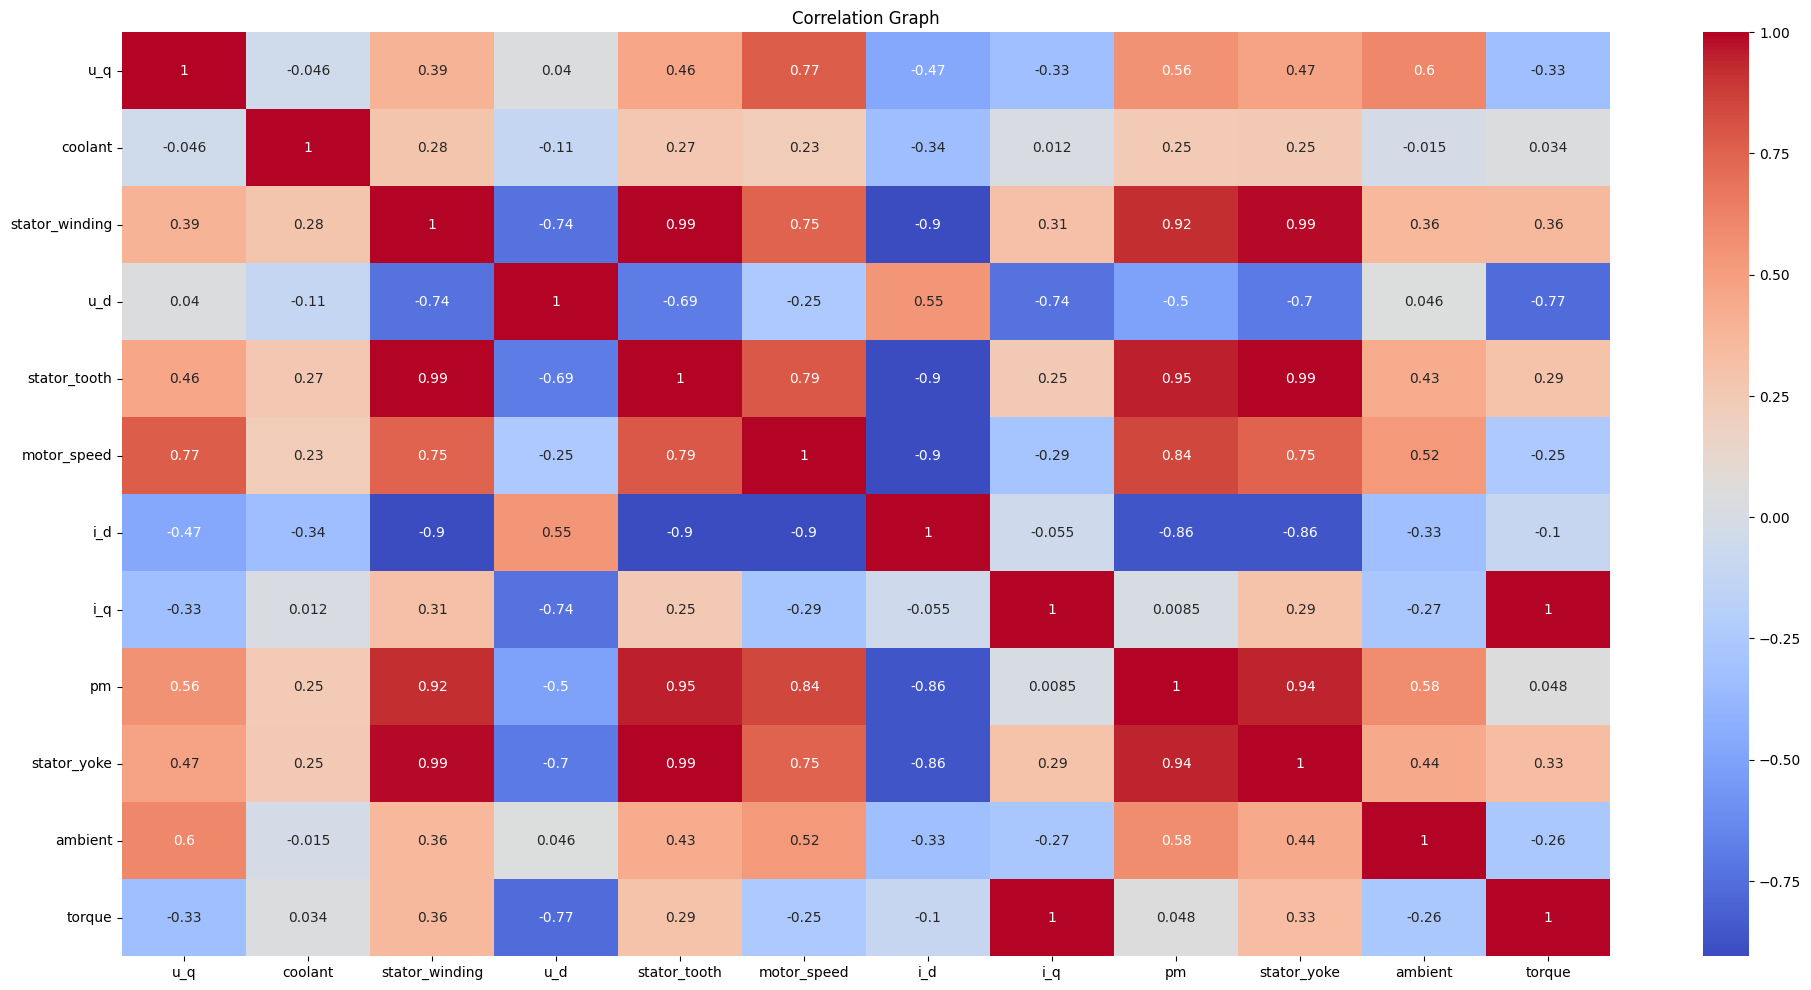

In [56]:
plt.figure(figsize=(24, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Graph')
plt.show()

In [57]:
df

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,97.313408,18.574137,25.265585,-0.408775,25.703962,1999.978149,-2.000111,1.098282,33.099789,23.306946,23.196777,-0.063604
49996,97.277214,18.539894,25.239769,-0.403208,25.692368,1999.977295,-2.001713,1.096653,33.095451,23.325966,23.205441,-0.073077
49997,97.257133,18.505558,25.234053,-0.398452,25.686609,1999.980591,-2.001548,1.097297,33.111149,23.330736,23.202974,-0.079101
49998,97.235535,18.456192,25.243505,-0.396260,25.688269,1999.979980,-1.999005,1.096315,33.125492,23.320904,23.218935,-0.085294


In [58]:
df_feature = df.drop('pm', axis=1)
df_target = df['pm']

df_target, df_feature

(0        24.554214
 1        24.538078
 2        24.544693
 3        24.554018
 4        24.565397
            ...    
 49995    33.099789
 49996    33.095451
 49997    33.111149
 49998    33.125492
 49999    33.149902
 Name: pm, Length: 50000, dtype: float64,
              u_q    coolant  stator_winding       u_d  stator_tooth  \
 0      -0.450682  18.805172       19.086670 -0.350055     18.293219   
 1      -0.325737  18.818571       19.092390 -0.305803     18.294807   
 2      -0.440864  18.828770       19.089380 -0.372503     18.294094   
 3      -0.327026  18.835567       19.083031 -0.316199     18.292542   
 4      -0.471150  18.857033       19.082525 -0.332272     18.291428   
 ...          ...        ...             ...       ...           ...   
 49995  97.313408  18.574137       25.265585 -0.408775     25.703962   
 49996  97.277214  18.539894       25.239769 -0.403208     25.692368   
 49997  97.257133  18.505558       25.234053 -0.398452     25.686609   
 49998  97.235535 

### Standardized Feature

In [59]:
df_feature_standard = StandardScaler().fit_transform(df_feature)
df_feature_standard = pd.DataFrame(df_feature_standard, columns=df_feature.columns)
df_feature_standard

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,stator_yoke,ambient,torque
0,-3.001303,0.156840,-1.573089,1.078612,-1.713514,-1.607714,1.136050,-1.001368,-1.746931,-4.011192,-1.007350
1,-2.996759,0.187979,-1.572732,1.079694,-1.713376,-1.607716,1.135972,-1.001387,-1.747161,-4.011213,-1.006096
2,-3.000946,0.211680,-1.572920,1.078063,-1.713438,-1.607715,1.135986,-1.001367,-1.745522,-4.011231,-1.007576
3,-2.996806,0.227477,-1.573316,1.079440,-1.713573,-1.607712,1.135960,-1.001340,-1.744869,-4.011241,-1.006249
4,-3.002047,0.277362,-1.573347,1.079047,-1.713670,-1.607714,1.134634,-1.000752,-1.745471,-4.011250,-1.006897
...,...,...,...,...,...,...,...,...,...,...,...
49995,0.553953,-0.380075,-1.187793,1.077176,-1.069670,-0.398014,1.094759,-0.982998,-1.026406,-0.198961,-1.012743
49996,0.552637,-0.459653,-1.189402,1.077312,-1.070678,-0.398015,1.094726,-0.983026,-1.023660,-0.189091,-1.012947
49997,0.551907,-0.539448,-1.189759,1.077428,-1.071178,-0.398013,1.094730,-0.983015,-1.022971,-0.191901,-1.013076
49998,0.551122,-0.654172,-1.189169,1.077482,-1.071034,-0.398013,1.094782,-0.983031,-1.024391,-0.173717,-1.013209


In [60]:
x_train, x_test, y_train, y_test = train_test_split(df_feature, df_target, test_size=0.3, random_state=42)

### XGBoost

In [61]:
model_xgboost = xgb.XGBRegressor()

param_xgb = {
    'objective': ['reg:squarederror'],
    'subsample': np.linspace(0.001, 1, dtype=float),
    'learning_rate': np.linspace(0.001, 0.5, dtype=float),
    'max_depth': np.linspace(1, 20, dtype=int),
    'n_estimators': np.linspace(1, 100, dtype=int),
    'colsample_bytree': np.linspace(0.1, 1, dtype=float),
}

In [62]:
# Random Search
xgb_random = RandomizedSearchCV(
    model_xgboost, param_distributions=param_xgb, n_iter=30, scoring='neg_mean_squared_error', cv=5)

xgb_random.fit(x_train, y_train)

KeyboardInterrupt: 

In [ ]:
best_xgb = xgb_random.best_estimator_
y_pred_xgb = best_xgb.predict(x_test)
r2_xgb = best_xgb.score(x_test, y_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

print(f'XGBoost Best Params : {xgb_random.best_params_}')
print(f'XGBoost MSE : {mse_xgb}')
print(f'XGBoost R2 : {r2_xgb}')

XGBoost Best Params : {'subsample': 0.9796122448979593, 'objective': 'reg:squarederror', 'n_estimators': 97, 'max_depth': 11, 'learning_rate': 0.08246938775510204, 'colsample_bytree': 0.6877551020408164}
XGBoost MSE : 0.01790379677386373
XGBoost R2 : 0.9998837080133327


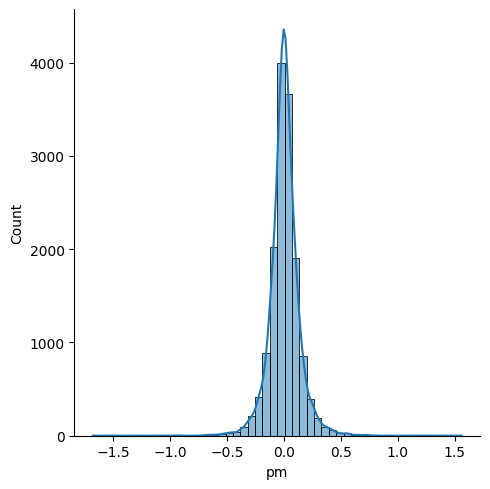

In [67]:
sns.displot(y_test - y_pred_xgb, kde=True, bins=50)

### AdaBoost

In [ ]:
model_adaboost = AdaBoostRegressor()
param_adaboost = {
    'n_estimators': np.linspace(1, 100, dtype=int),
    'learning_rate': np.linspace(0.001, 0.5, dtype=float),
    'loss': ['linear', 'square', 'exponential'],
}

In [ ]:
ada_random = RandomizedSearchCV(
    model_adaboost, param_distributions=param_adaboost, n_iter=30, scoring='neg_mean_squared_error', cv=5)
ada_random.fit(x_train, y_train)

KeyboardInterrupt: 

In [ ]:
best_ada = ada_random.best_estimator_
y_pred_ada = best_ada.predict(x_test)
r2_ada = best_ada.score(x_test, y_test)
mse_ada = mean_squared_error(y_test, y_pred_ada)

print(f'AdaBoost Best Params : {ada_random.best_params_}')
print(f'AdaBoost MSE : {mean_squared_error(y_test, y_pred_ada)}')
print(f'AdaBoost R2 : {r2_ada}')

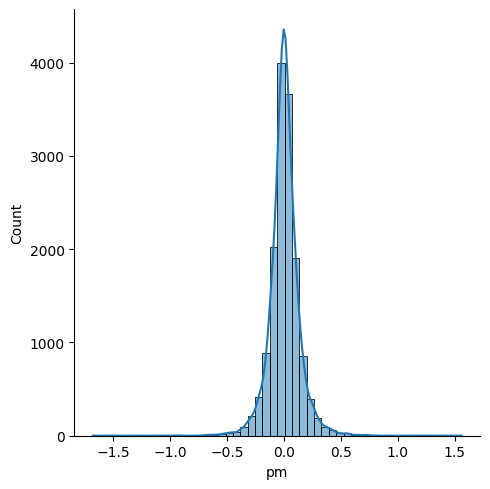

In [68]:
sns.displot(y_test - y_pred_xgb, kde=True, bins=50)